# Lab 6 -- KNN Classification

### Esraaj Sarkar Gupta
### February 21, 2026

In [5]:
# ---- Imports ---- #

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -- My Little Imports :3 --#
from pathlib import Path
from tqdm import tqdm

print("Imports completed...")

Imports completed...


In [6]:
# ---- Load Data ---- #

training_data_path : Path = Path("tblTrain.csv")
test_data_path : Path = Path("tblTest.csv")

training_data : pd.DataFrame = pd.read_csv(training_data_path)
test_data : pd.DataFrame = pd.read_csv(test_data_path)

display(training_data.head())

print(f"Training data of length {len(training_data)} and test data loaded. Test : Train ratio = {len(test_data)/len(training_data) * 100 :.2f}%")

,Name,Duration,Genre,Rating
0,#Gadhvi (He thought he was Gandhi),99,Drama,7.0
1,@Andheri,126,Action,4.0
2,1:1.6 An Ode to Lost Love,86,Drama,6.2
3,13B: Fear Has a New Address,136,Drama,7.3
4,15th August,158,Drama,5.6


Training data of length 2797 and test data loaded. Test : Train ratio = 24.99%


Plotting points:   0%|          | 0/2797 [00:00<?, ?it/s]

Plotting points: 100%|██████████| 2797/2797 [00:10<00:00, 271.31it/s]


Text(0.5, 1.0, 'Indian Movies Dataset (Rating vs Duration) -- Training Set ')

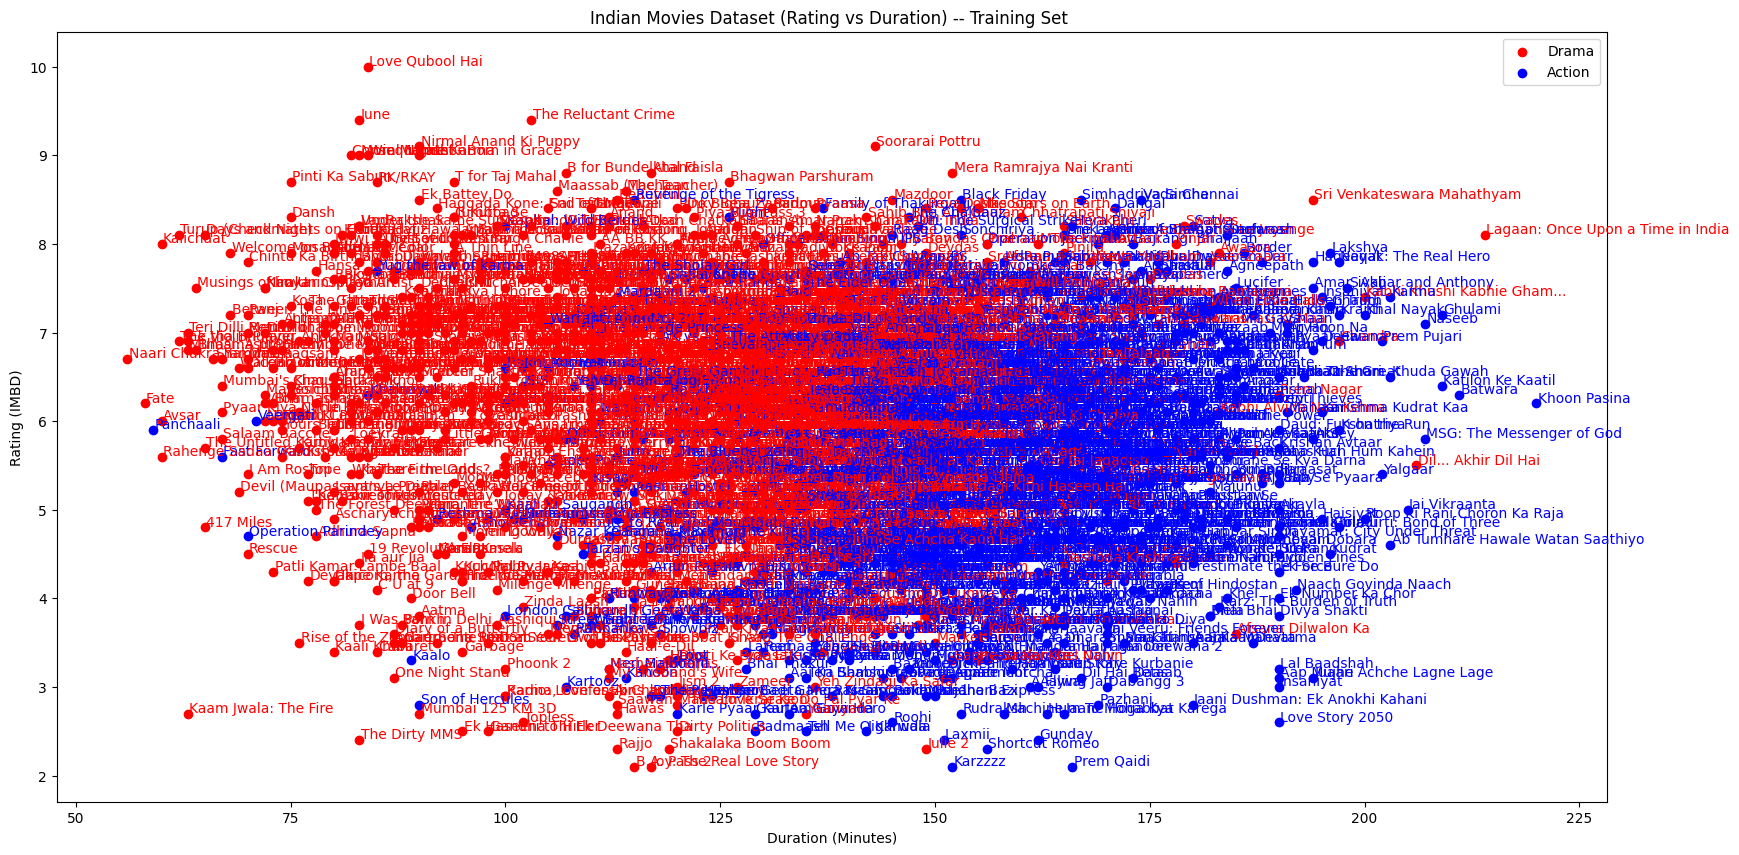

In [ ]:
# ---- Display Training Set ---- #

colours = ["blue" if genre == "Action" else "red" for genre in training_data["Genre"]]

fig, ax = plt.subplots(figsize=(20,10))
seen = set()

for text, colour, genre, duration, rating in tqdm(
    zip(
        training_data["Name"].astype(str),
        colours,
        training_data["Genre"],
        training_data["Duration"].astype(float),
        training_data["Rating"].astype(float)
    ),
    total=len(training_data),
    desc="Plotting points"
):
    ax.scatter(duration, rating, color=colour, label=genre if genre not in seen else None)
    seen.add(genre) # Some extra steps to get the legend displayed well.
    ax.annotate(
        text,
        xy=(duration, rating),
        xytext=(1, 1),
        textcoords="offset points",
        color = colour
    )

ax.set_xlabel("Duration (Minutes)")
ax.set_ylabel("Rating (IMBD)")

ax.legend()
ax.set_title("Indian Movies Dataset (Rating vs Duration) -- Training Set ")



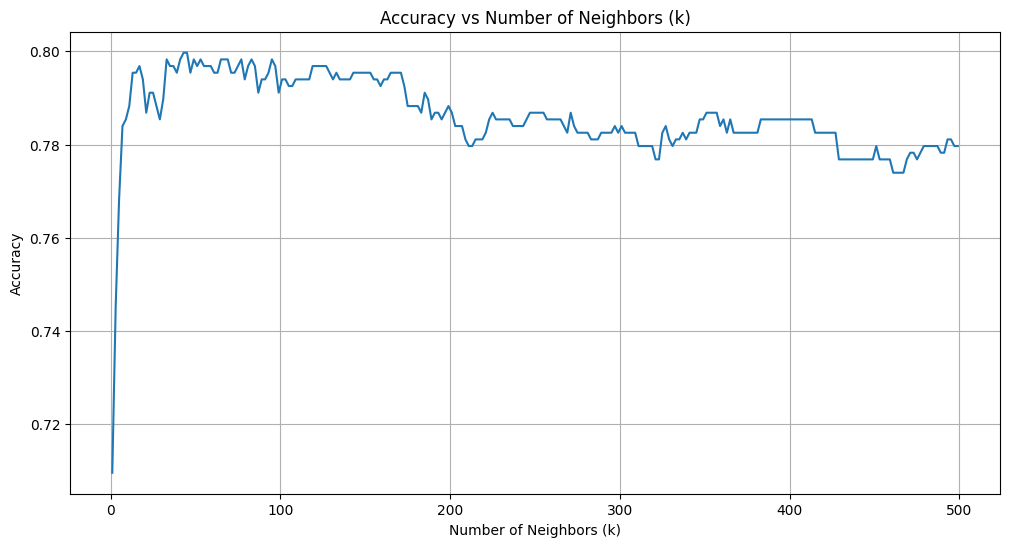

In [ ]:
# ---- Model Development ---- #

# -- Imports -- #
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# -- Data -- #
X_train = training_data[["Duration", "Rating"]].to_numpy()
y_train = training_data["Genre"].to_numpy()

X_test = test_data[["Duration", "Rating"]].to_numpy()
y_test = test_data["Genre"].to_numpy()

accuracies : list[tuple] = list([])

# -- Define KNN Neighbours List -- #
knn_neighbours : range = range(1, 500, 2)

# -- Iterate through KNN ranges -- #
for k in knn_neighbours:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)

    # - Prediction - #
    y_pred = model.predict(X_test)

    # - Confusion Matrix - #
    cm = confusion_matrix(y_test, y_pred)

    # - Accuracy Calculation - #
    accuracy = cm.trace() / cm.sum()

    accuracies.append((k, accuracy))

# -- Accuracy vs K Graph -- #
ks = [k for k, acc in accuracies]       # Extract k values
accs = [acc for k, acc in accuracies]   # Extract corresponding accuracies

plt.figure(figsize=(12, 6))
plt.plot(ks, accs, linestyle="-")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors (k)")
plt.grid(True)
plt.show()
    

In [ ]:
# ---- Best K ---- #

best_k, best_acc = max(accuracies, key=lambda x: x[1]) # Maximize the 1st index

print("Best k:", best_k)
print("Best Accuracy:", best_acc)

Best k: 43
Best Accuracy: 0.7997138769670958


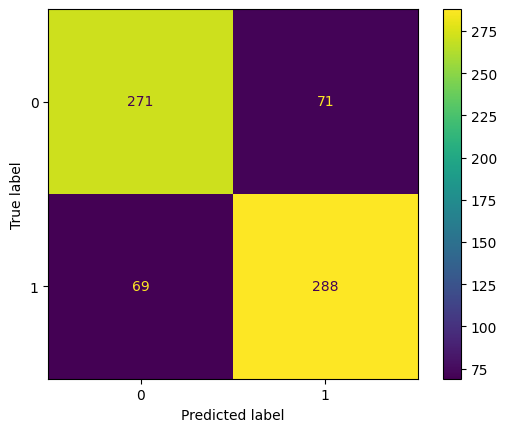

In [18]:
# ---- Best K Confusion Matrix ---- #

# Retrain the best model on the best K
best_model = KNeighborsClassifier(n_neighbors = best_k)
best_model.fit(X_train, y_train)

# Run the best prediction once again
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# I didn't leave enough witty comments in this lab.
# I feel like I'm losing personality.
# Perhaps I'm just maturing. I turn 19 this 24th!
# You should listen to the song Why Should I Cry For You by Sting.
# I hope your day is better :)

# Report

### Question 1
 The $k$ value in KNN determines the number of nearest neighbours the algorithm considers to make a prediction.

### Question 2
 One may find the best value of $k$ by evaluating the model on a large number of $k$s and chosing the value that performs best -- a brute force method, that is also employed in this assignment.

### Question 3
 Small $k$ values allow greater flexibility to the model, thus making it prone to higher variance but low bias.

 Higher values of $k$ can tend to overfit on the given training data, leading to greater bias but lower variance.

### Question 4
 Like any ML algorithm that utilizes distance metrics, KNN is sensitive to outliers, especially at lower $k$ values. KNN makes decisions based on the proximity of surrounding points. Thus, a single outlier than significantly shift the prediction. This is even more pronounced when $k$ is low since whne the number of outliers is on the same order as $k$ it will have a greater effect on the prediction. 

 Using larger $k$ values (still must be much smaller than the size of classes) or introducing weighted points can help.

### Question 5
 Again, just like other ML models that utilize distance metrics, KNN is sensitive to the scales of features. Features with greater scales, if not standardized, will dominate the distance metric and as a result dominate the algorithm. 

 Features must be either normalized or (better) standarized before being fed into the KNN algorithm. 

